In [1]:
import numpy as np
import math
import tqdm

%matplotlib inline
import matplotlib.pyplot as plt

# Chapter 1.1 Example: Polynomial Curve Fitting

## Polynomial Curve Fitting

In [2]:
# Polynomial with the coefficient, w_vector. 
# 1 + w0*x + w1*x^2 + w2*x^3 + ...
def y_polynomial(x, w_vector):
    w_list = w_vector[0].tolist()
    return sum([w * np.power(x, j) for j, w in enumerate(w_list)])

In [3]:
# non-normalize l2 error function
def error_function(w_vector, x_sample, y):
    yx = [y_polynomial(x, w_vector) for x in x_sample]
    return np.sum(np.power(yx - y, 2)) / 2

In [4]:
# sin 2*(pi)*x function.
def function_to_fit(x):
    return np.sin(2.0 * math.pi * x)

In [5]:
# Implement polynomial curve fitting with solving normal equation.
def polynomial_curve_fitting(x_sample, t_sample, N):
    N = N + 1
    X = np.zeros((N,N), dtype=float)
    for x in x_sample:
        p = np.array([math.pow(x, j) for j in range(N)])
        X += p.reshape(-1,1) * p
    
    b = np.zeros((1,N), dtype=float)
    for idx, x in enumerate(x_sample):
        b += np.array([math.pow(x, j) * t_sample[idx] for j in range(N)])
    
    
    w_vector, residuals, rank, s = np.linalg.lstsq(X,b.T)
    rmse = root_mean_square_error(w_vector, x_sample, t_sample)
    error = error_function(w_vector, x_sample, t_sample)
    return error, rmse, w_vector

In [6]:
def root_mean_square_error(w_vector, x_sample, y):
    N = w_vector.shape[0]
    return np.sqrt(2 * error_function(w_vector, x_sample, y) / N)

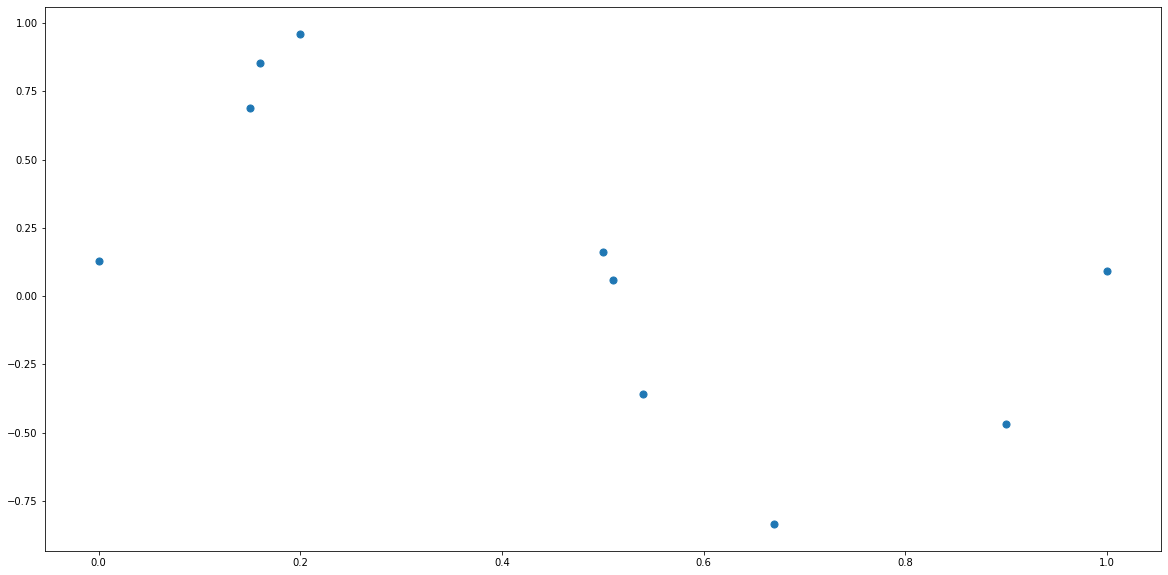

In [7]:
# Sample some x values.
x_sample = np.array([0.0, 0.15, 0.16, 0.2, 0.5, 0.51, 0.54, 0.67, 0.9, 1.0])

# Mix some noise, unless you will get the accurate result for all choices of M,
# because sin function can be expressed with tayler series.
# You can check that PRML book example Fig 1.4 is using the data with noise, not the exact value.
noise = np.array([0.13, -0.12, 0.01, 0.01, 0.16, 0.12, -0.11, 0.04, 0.12, 0.09])
t_sample = function_to_fit(x_sample) + noise

plt.figure(figsize=(20, 10))
plt.scatter(x_sample, t_sample, s=50)

//anaconda3/envs/prml/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


M=1
error: 2.901443315657737
rmse: 1.703362355947124
w: [[ 0.65108588 -1.13002802]]
M=3
error: 1.5412448764783517
rmse: 0.8778510341961077
w: [[  0.0866317    8.63924145 -26.79289063  18.1988811 ]]
M=5
error: 1.5327406660073915
rmse: 0.7147821733477949
w: [[ 1.26977234e-01  7.88365398e-01  4.62841742e+01 -1.91436935e+02
   2.37130609e+02 -9.28087625e+01]]
M=7
error: 1.5327536552696093
rmse: 0.6190221432367362
w: [[ 1.29731720e-01  3.32269593e+01 -5.22408256e+02  3.47827006e+03
  -1.08463082e+04  1.68644459e+04 -1.27368059e+04  3.72953971e+03]]
M=9
error: 1.5327589929437775
rmse: 0.5536712007940773
w: [[ 1.30000842e-01 -1.85173059e+02  3.44167628e+03 -2.37257225e+04
   7.83636571e+04 -1.25509866e+05  6.46134792e+04  7.02876761e+04
  -1.04920131e+05  3.76343638e+04]]


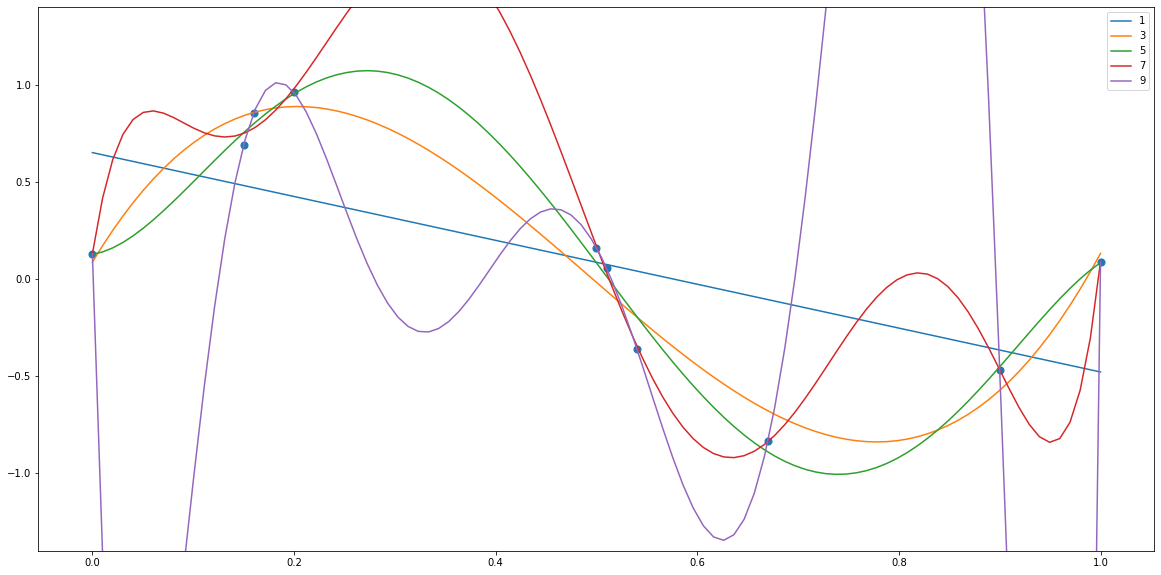

In [8]:
plt.figure(figsize=(20, 10))
plt.ylim(ymax = 1.4, ymin = -1.4)

# Plot sample data
plt.scatter(x_sample, t_sample, s=50)

rmse_plot_x = []
w_vectors = []
for i in range(1, 10, 2):
    error, rmse, w_vector = polynomial_curve_fitting(x_sample, t_sample, i)
    
    w_vectors.append(w_vector)
    rmse_plot_x.append(i)
    
    print(f"M={i}")
    print(f"error: {error}")
    print(f"rmse: {rmse}")
    # Show similar result with Table 1.1.
    print(f"w: {w_vector.T}")
    
    # Plot fitted polynomial curves.
    x = np.linspace(0, 1, 100)
    plt.plot(x, y_polynomial(x, w_vector.T).T, label=f"{i}")
    plt.legend()
plt.show()

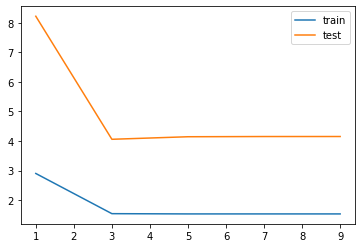

In [9]:
# Plot rmse for test set
x_sample_test = np.linspace(0, 1, 20)
noise = np.linspace(-0.14, 0.14, 20)
y_test = function_to_fit(x_sample_test) + noise


# Plot rmse for train, test set, which is Figure 1.5.
rmse_plot_y_train = []
rmse_plot_y_test = []
for idx, w_vector in enumerate(w_vectors):
    rmse = error_function(w_vector, x_sample, t_sample)
    rmse_plot_y_train.append(rmse)
    
    rmse_test = error_function(w_vector, x_sample_test, y_test)
    rmse_plot_y_test.append(rmse_test)

plt.plot(rmse_plot_x, rmse_plot_y_train, label="train")
plt.plot(rmse_plot_x, rmse_plot_y_test, label="test")

plt.legend()

## Reducing overfitting

### 1. Increase the number of data

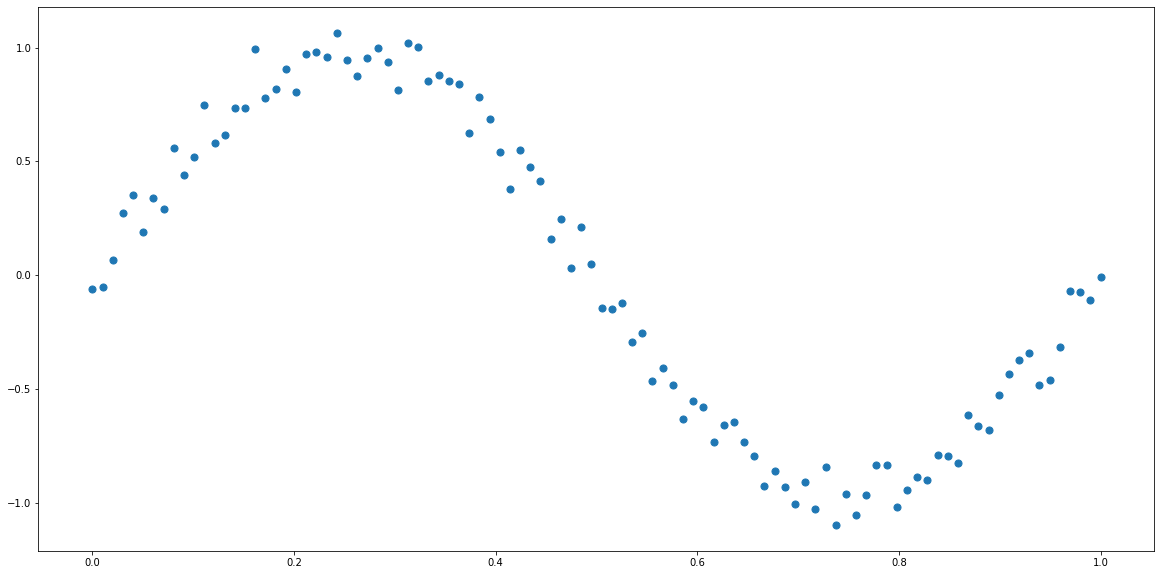

In [10]:
# Sample more values, N = 100
x_sample = np.linspace(0, 1, 100)

# Mix some noise, unless you will get the accurate result for all choices of M,
# because sin function can be expressed with tayler series.
# You can check that PRML book example Fig 1.4 is using the data with noise, not the exact value.
noise = (np.random.rand(100) - 0.5) * 0.3
t_sample = function_to_fit(x_sample) + noise

plt.figure(figsize=(20, 10))
plt.scatter(x_sample, t_sample, s=50)

//anaconda3/envs/prml/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


M=1
error: 64.10336126011579
rmse: 8.006457472572736
w: [[ 0.89010775 -1.78918539]]
M=3
error: 26.57323163438054
rmse: 3.6450810439810897
w: [[ -0.22740533  11.89256562 -34.26649474  22.79570113]]
M=5
error: 24.090887451732417
rmse: 2.8337776583994976
w: [[-1.13122835e-02  4.79866707e+00  1.69743874e+01 -1.16014837e+02
   1.57549956e+02 -6.33400923e+01]]
M=7
error: 24.210339067669874
rmse: 2.4602001477354376
w: [[-5.38371977e-02  7.61699666e+00 -2.33270818e+01  1.14767476e+02
  -4.89069757e+02  8.79413009e+02 -6.86700737e+02  1.97360759e+02]]
M=9
error: 24.407397402392252
rmse: 2.209407042733061
w: [[-8.43398855e-02  1.03887046e+01 -7.69498519e+01  5.41347945e+02
  -2.23460613e+03  4.92944003e+03 -6.19838380e+03  4.52121191e+03
  -1.78949352e+03  2.97113784e+02]]


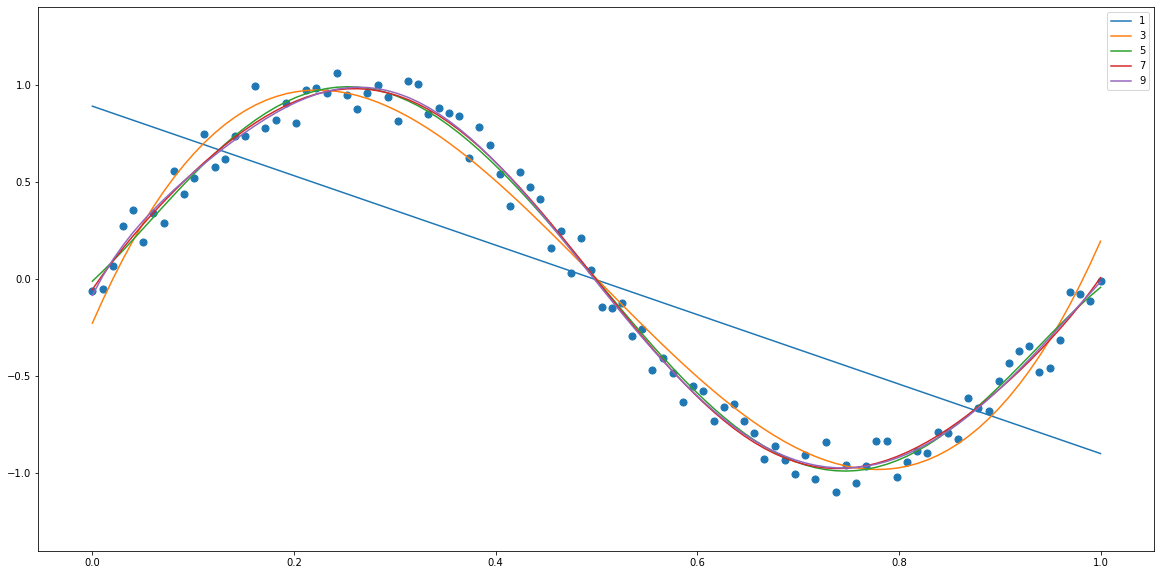

In [11]:
plt.figure(figsize=(20, 10))
plt.ylim(ymax = 1.4, ymin = -1.4)

# Plot sample data, Figure 1.6.
plt.scatter(x_sample, t_sample, s=50)

rmse_plot_x = []
w_vectors = []
for i in range(1, 10, 2):
    error, rmse, w_vector = polynomial_curve_fitting(x_sample, t_sample, i)
    
    w_vectors.append(w_vector)
    rmse_plot_x.append(i)
    
    print(f"M={i}")
    print(f"error: {error}")
    print(f"rmse: {rmse}")
    # Show similar result with Table 1.1.
    print(f"w: {w_vector.T}")
    
    # Plot fitted polynomial curves.
    x = np.linspace(0, 1, 100)
    plt.plot(x, y_polynomial(x, w_vector.T).T, label=f"{i}")
    plt.legend()
plt.show()

### 2. Use regularization term

In [12]:
# Set regularization term value.
reg = -13

In [13]:
# Implement polynomial curve fitting with solving normal equation with the regularization term.
def polynomial_curve_fitting_with_regularization(x_sample, t_sample, N, reg):
    N = N + 1
    X = np.zeros((N,N), dtype=float)
    for x in x_sample:
        p = np.array([math.pow(x, j) for j in range(N)])
        X += p.reshape(-1,1) * p
        
    reg_term = math.pow(math.e, reg) * np.eye(N)
    reg_term[0][0] = 0
    
    X += reg_term
    
    b = np.zeros((1,N), dtype=float)
    for idx, x in enumerate(x_sample):
        b += np.array([math.pow(x, j) * t_sample[idx] for j in range(N)])
    
    w_vector, residuals, rank, s = np.linalg.lstsq(X,b.T)
    rmse = root_mean_square_error(w_vector, x_sample, t_sample)
    error = error_function(w_vector, x_sample, t_sample)
    return error, rmse, w_vector

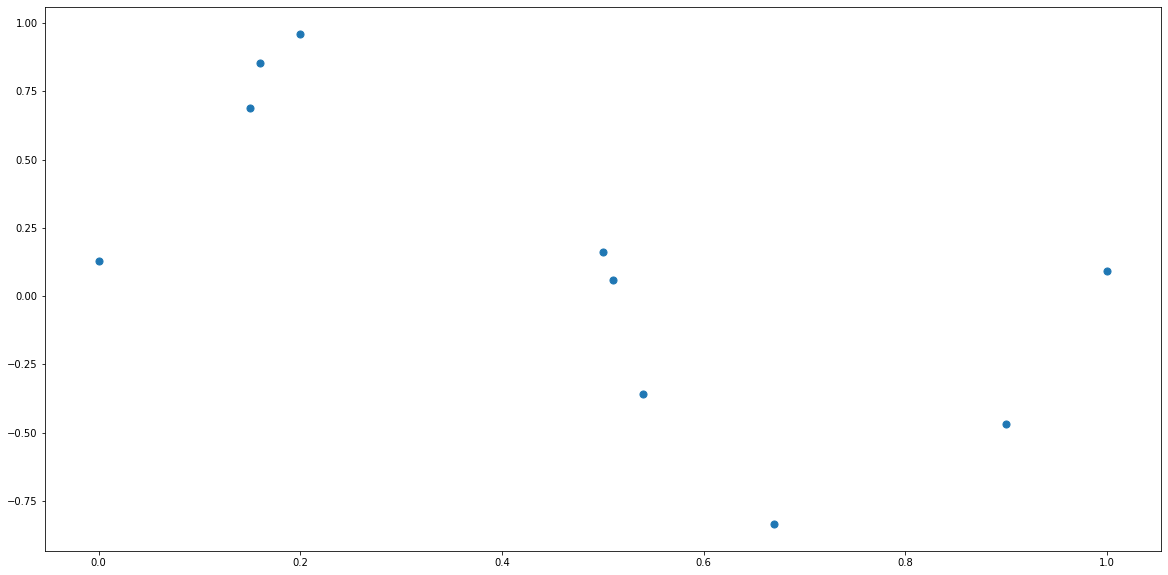

In [14]:
# Sample some x values.
x_sample = np.array([0.0, 0.15, 0.16, 0.2, 0.5, 0.51, 0.54, 0.67, 0.9, 1.0])

# Make t values by mixing some noise
noise = np.array([0.13, -0.12, 0.01, 0.01, 0.16, 0.12, -0.11, 0.04, 0.12, 0.09])
t_sample = function_to_fit(x_sample) + noise

plt.figure(figsize=(20, 10))
plt.scatter(x_sample, t_sample, s=50)

//anaconda3/envs/prml/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


M=1
error: 2.901437159066894
rmse: 1.7033605487585104
w: [[ 0.65108471 -1.13002548]]
M=3
error: 1.5406800475718843
rmse: 0.8776901638881127
w: [[  0.08802445   8.61964109 -26.74409254  18.16765446]]
M=5
error: 1.5359859986063755
rmse: 0.7155384915354253
w: [[  0.10239003   6.14482326  -4.04969953 -46.16821965  71.93957153
  -27.84443422]]
M=7
error: 1.5333313809908027
rmse: 0.6191387932020579
w: [[  0.11697588   5.04347055   1.1418161  -35.29403433   9.45940322
   30.12946897  13.37405404 -23.8811956 ]]
M=9
error: 1.5332154185635782
rmse: 0.5537536308799389
w: [[  0.11809666   5.29863423  -1.55273521 -28.15693115   7.40187521
   20.83141124  10.7635617   -3.96691916  -9.70866017  -0.94024015]]


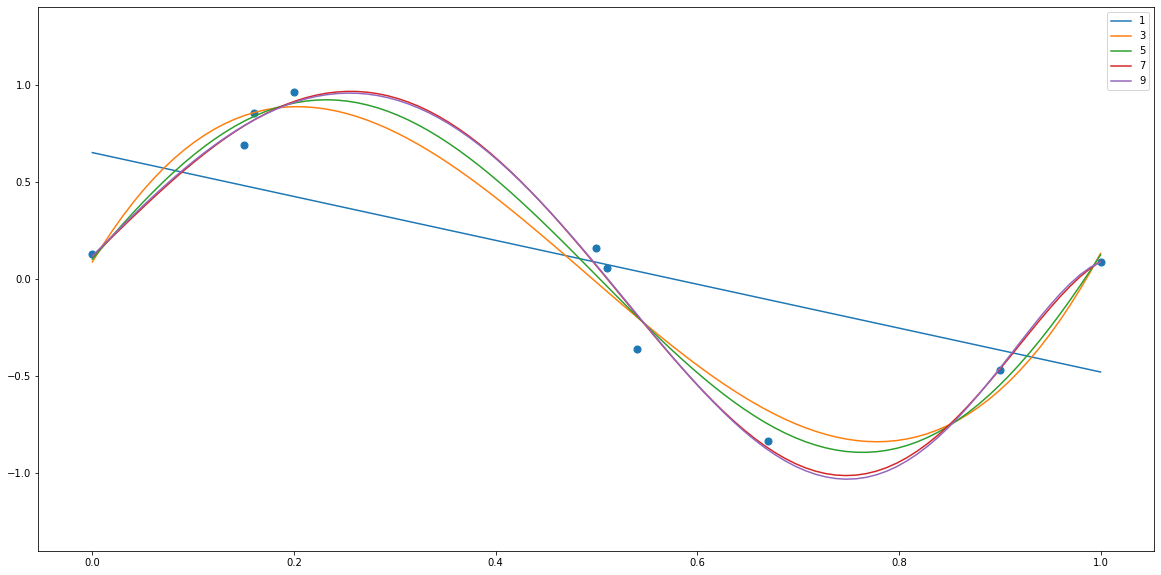

In [15]:
plt.figure(figsize=(20, 10))
plt.ylim(ymax = 1.4, ymin = -1.4)

# Plot sample data
plt.scatter(x_sample, t_sample, s=50)

rmse_plot_x = []
w_vectors = []
for i in range(1, 10, 2):
    error, rmse, w_vector = polynomial_curve_fitting_with_regularization(x_sample, t_sample, i, reg)
    
    w_vectors.append(w_vector)
    rmse_plot_x.append(i)
    
    print(f"M={i}")
    print(f"error: {error}")
    print(f"rmse: {rmse}")
    # Show similar result with Table 1.1.
    print(f"w: {w_vector.T}")
    
    # Plot fitted polynomial curves.
    x = np.linspace(0, 1, 100)
    plt.plot(x, y_polynomial(x, w_vector.T).T, label=f"{i}")
    plt.legend()
plt.show()

### 2-1. Regularization term characteristics

//anaconda3/envs/prml/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


reg=-inf
w: [[ 0.43414511 -0.43113033 -0.34706872 -0.19562665 -0.0786476   0.0030877
   0.05990133  0.10013129  0.12935909  0.15119242]]
reg=-13
w: [[ 0.43414482 -0.43112978 -0.34706825 -0.19562642 -0.07864755  0.00308762
   0.05990115  0.10013104  0.1293588   0.1511921 ]]
reg=0
w: [[ 0.32092808 -0.22698752 -0.18290771 -0.11379742 -0.06106505 -0.0241752
   0.0016581   0.02016707  0.03381584  0.04418453]]


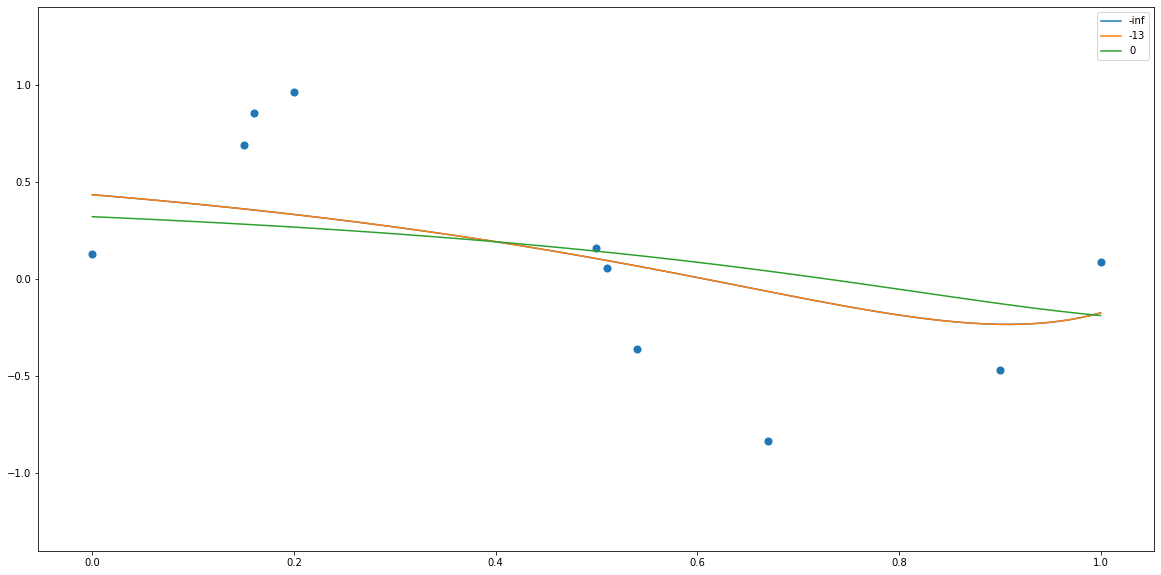

In [21]:
plt.figure(figsize=(20, 10))
plt.ylim(ymax = 1.4, ymin = -1.4)

# Plot sample data
plt.scatter(x_sample, t_sample, s=50)

N = 9
# Make the curve simpler when the regularization term close to zero
reg_exponents = [-math.inf, -13, 0]
for idx, reg_exponent in enumerate(reg_exponents):
    error, rmse, w_vector = polynomial_curve_fitting_with_regularization(x_sample, t_sample, N, 
                                                                         math.pow(math.e, reg_exponent))
    
    w_vectors.append(w_vector)
    rmse_plot_x.append(i)
    
    print(f"reg={reg_exponent}")
    # Show similar result with Table 1.1.
    print(f"w: {w_vector.T}")
    
    # Plot fitted polynomial curves.
    x = np.linspace(0, 1, 100)
    plt.plot(x, y_polynomial(x, w_vector.T).T, label=f"{reg_exponent}")
    plt.legend()

//anaconda3/envs/prml/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


reg=-25
w: [[ 1.29735310e-01  1.26373211e+01 -1.40120586e+02  7.54831439e+02
  -1.29164932e+03 -7.35033580e+02  3.03264450e+03  3.06062134e+02
  -4.04111448e+03  2.10170282e+03]]
reg=-23
w: [[ 1.29985749e-01  1.38022309e+01 -1.66578477e+02  9.75686999e+02
  -2.15102949e+03  8.50638138e+02  2.05078013e+03 -5.79505800e+02
  -2.50961869e+03  1.51578490e+03]]
reg=-21
w: [[ 1.31067458e-01  7.76327381e+00 -8.04357763e+01  5.60379907e+02
  -1.41083974e+03  7.32813231e+02  1.23928126e+03 -4.90125632e+02
  -1.52564895e+03  9.66771077e+02]]
reg=-19
w: [[ 1.32136764e-01 -1.59851122e-01  3.50478556e+01 -1.54043960e+01
  -3.03825801e+02  3.19216526e+02  3.34085071e+02 -2.27251682e+02
  -4.80932347e+02  3.39181910e+02]]
reg=-17
w: [[ 1.30279198e-01 -1.35425848e+00  5.91086613e+01 -1.65772180e+02
   3.08197380e+01  1.62523921e+02  5.43495541e+01 -1.22746260e+02
  -1.43918492e+02  1.26948108e+02]]
reg=-15
w: [[  0.12338726   2.34906007  26.04921201 -96.07834805  36.30803855
   73.08222839  13.89450756

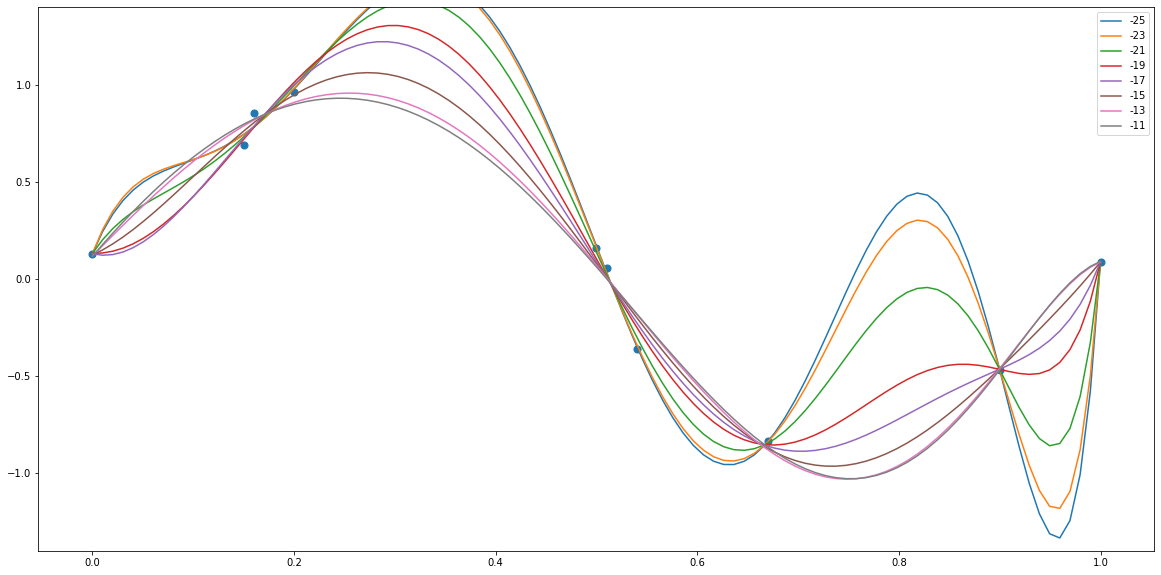

In [19]:
plt.figure(figsize=(20, 10))
plt.ylim(ymax = 1.4, ymin = -1.4)

# Plot sample data
plt.scatter(x_sample, t_sample, s=50)

N = 9
for reg_exponent in range(-25, -10, 2): # Variate regularization terms' exponents
    error, rmse, w_vector = polynomial_curve_fitting_with_regularization(x_sample, t_sample, N, reg_exponent)
    
    w_vectors.append(w_vector)
    rmse_plot_x.append(i)
    
    print(f"reg={reg_exponent}")
    # Show similar result with Table 1.1.
    print(f"w: {w_vector.T}")
    
    # Plot fitted polynomial curves.
    x = np.linspace(0, 1, 100)
    plt.plot(x, y_polynomial(x, w_vector.T).T, label=f"{reg_exponent}")
    plt.legend()

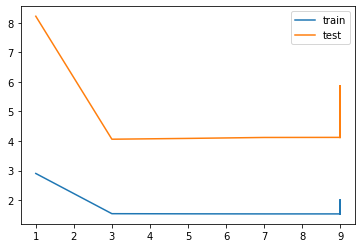

In [20]:
# Plot rmse for test set
x_sample_test = np.linspace(0, 1, 20)
noise = np.linspace(-0.14, 0.14, 20)
y_test = function_to_fit(x_sample_test) + noise


# Plot rmse for train, test set, which is Figure 1.5.
rmse_plot_y_train = []
rmse_plot_y_test = []
for idx, w_vector in enumerate(w_vectors):
    rmse = error_function(w_vector, x_sample, t_sample)
    rmse_plot_y_train.append(rmse)
    
    rmse_test = error_function(w_vector, x_sample_test, y_test)
    rmse_plot_y_test.append(rmse_test)

plt.plot(rmse_plot_x, rmse_plot_y_train, label="train")
plt.plot(rmse_plot_x, rmse_plot_y_test, label="test")

plt.legend()